# 특성 공학

이전에는 하나의 특성(길이)만을 사용하여 선형 회귀 모델을 훈련시켰다.

그런데 높이, 두께 등의 다른 특성을 더 활용하면 더욱 효과가 좋다.

이와 같이, 여러 개의 특성을 사용한 선형 회귀를 "다중 회귀"라고 부른다.

- 1개의 특성 --> 직선을 학습 ( ax + by + c = 0 )
- 2개의 특성 --> 평면을 학습 ( ax + by + cz + d = 0)
- 특성이 많아질수록 --> 더욱 복잡한 모델 표현 가능


---

여기에 더하여, "특성 공학" 기법을 적용해보자.

특성 공학: 기존의 특성을 이용하여 새로운 특성을 뽑아내는 작업

이전에 길이^2(왕길이)을 만들어 추가한 것도 특성 공학의 하나

아래 예제에서는, 길이, 높이, 두께의 제곱수를 추가하고, 각각의 특성끼리 곱한 값도 추가하자.

특성이 3개로 늘어났기 때문에, 데이터를 복붙하는 것도 번거롭다.

인터넷에서 바로 받을 수 있으면 좋겠지만, 넘파이는 지원 X --> 판다스는 지원한다.

판다스 데이터프레임을 만들기 위해 많이 사용하는 파일은 CSV 파일.

판다스 read_csv() 함수에 파일의 주소를 넣고 읽은 후, to_numpy() 함수로 넘파이 배열로 변환하자.

In [1]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()

print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

타깃 데이터는 이전과 동일하게 복붙해오자.

In [2]:
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

이제 우리의 특성에 특성 공학 기법을 적용하여, 새로운 특성들을 추가할 텐데,

사이킷런에서 이를 생성하는데 필요한 클래스를 '변환기(transformer)'라고 한다.

여기서 사용할 변환기는 PolynomialFeatures 클래스

In [5]:
from sklearn.preprocessing import PolynomialFeatures

PolynomialFeatures에서 특성 변환을 위해서는,

fit() 으로 새롭게 만들 특성 조합을 찾고, transform() 으로 실제 데이터를 변환한다.

예시를 통해 확인해보자.

In [6]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
poly.transform([[2, 3]])

array([[1., 2., 3., 4., 6., 9.]])

"2의 제곱, 3의 제곱, 2와 3의 곱" 항이 추가되었음을 알 수 있다.

1은 왜 추가 되었을까?

예측값 = a×특성1 + b×특성2 + c×특성3 + ... + z×1

선형 방정식의 절편은 항상 값이 1인 특성과 곱해지는 계수라고 볼 수 있기 때문.

(특성1, 특성2, 특성3, ..., 1) = (가중치들과 bias)

하지만, 사이킷런의 선형 모델은 자동으로 절편을 추가하므로, 굳이 bias 특성을 만들 필요는 없다.

In [7]:
# include_bias는 절편을 위한 특성 추가 여부를 결정 (default=True)
# interaction_only는 제곱항을 제외하고, 특성 간의 곱셈항만 추가 (default=False)

poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
poly.transform([[2, 3]])

array([[2., 3., 4., 6., 9.]])

이제 이 방식으로 train_input, test_input을 변환해보자.

In [9]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input) # 훈련 세트로 변환기를 학습하자.
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input) # 반드시 테스트 세트도 변환해주어야 한다.

print(train_poly.shape)
print(test_poly.shape)

(42, 9)
(14, 9)


3개의 특성을 a, b, c로 두었을 때,

최종적으로 만들어진 특성은, [a, b, c, a^2, b^2, c^2, ab, bc, ca]로 총 9개!

42개의 샘플은 각각 9개의 특성을 갖게 된다.

다중 회귀 모델을 훈련하고, 평가해보자

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9903183436982124

In [11]:
# 테스트 세트에 대한 평가도
lr.score(test_poly, test_target)

0.9714559911594132

과소적합 문제가 해결되었고, 훈련 세트에 대한 점수도 아주 높다!

그렇다면 특성을 더 많이 추가해본다면?

In [12]:
# PolynomialFeatures 클래스의 degree 변수를 조정하여, 필요한 고차항의 최대 차수를 5차로 지정해보자. (default=2)
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)

(42, 55)


무려 특성 개수가 55이다.

이것으로 선형 회귀 모델을 다시 꾸며서 평가해보자

In [13]:
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999991096
-144.40579242335605


와, 테스트 세트의 R^2 점수가 음수가 나왔다. --> 훈련 모델에 너무너무 과대 적합

이번엔 이 과대 적합 문제를 해결하기 위한 방법을 배워보자.

# 규제

규제: 모델이 훈련 세트에 과대적합되지 않도록 훼방하는 것.
- 선형 회귀 모델에서는, 특성에 곱해지는 계수(기울기)의 크기를 작게 만드는 것이다.

단, 규제를 적용하기 전에, 특성의 스케일의 정규화를 해야한다.

(특성의 스케일이 정규화되지 않으면 --> 계수의 스케일이 서로 차이가 나게 된다.)

(계수의 스케일에 차이가 있으면 --> 동일한 규제를 적용하면, 공정하게 제어되지 않는다.)

이전에는 Z값을 직접 구했지만, 여기서는 사이킷런의 StandardScaler 클래스를 사용해보자.

*학습된 평균과 표준편차는 StandardScaler 객체의 mean_, scale_ 속성에 저장된다.*

In [14]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly) # 훈련 세트로 변환기를 학습하자.
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly) # 반드시 테스트 세트도 변환해주어야 한다.

선형 회귀에 규제를 추가한 모델을 릿지(ridge)와 라쏘(lasso)라고 부른다.
- 릿지: 계수의 제곱을 기준으로 규제를 적용한다.
- 라쏘: 계수의 절대값을 기준으로 규제를 적용한다.

라쏘는 계수를 0으로 만드는 경우도 있기 때문에, 일반적으로 릿지를 선호한다.

In [15]:
# 릿지 회귀

from sklearn.linear_model import Ridge # 아예 이 릿지 클래스 자체가 모델임

ridge = Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)

0.9896101671037343

In [16]:
ridge.score(test_scaled, test_target)

0.9790693977615397

이렇게 과대적합 문제가 어느정도 해결되었다.

릿지와 라쏘 모델을 사용할 때, 규제의 양을 임의로 조절할 수 있는데, 이렇게 사람이 직접 지정해야 하는 매개변수를 "하이퍼파라미터"라고 한다.

alpha 매개변수로 조절 가능하며, 커질수록 규제 강도가 세지고, 작아질수록 규제 강도가 약해진다.

적절한 alpha 값을 찾는 한 가지 방법은, alpha 값에 대한 R^2 그래프를 그려 보는 것으로, 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값이 된다.

In [17]:
# 먼저, alpha 값을 바꿀 때마다 score() 함수의 결과를 저장할 리스트를 만들자.

import matplotlib.pyplot as plt

train_score = []
test_score = []

# 다음으로, alpha 값을 0.001 ~ 100 까지 10배씩 늘려가며 릿지 모델을 훈련한 다음,
# 훈련 세트와 테스트 세트의 점수를 리스트에 저장하자.

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha) # default=1
    ridge.fit(train_scaled, train_target)

    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

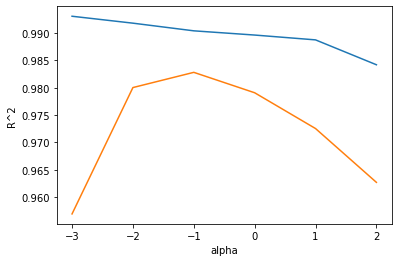

In [18]:
# 이제 그래프를 그려보자.
# 단, 알파값이 지수 증가를 하므로, log를 씌워 그래프의 간격이 일정해지게끔 하자.

plt.plot(np.log10(alpha_list), train_score) # 가로축엔 알파(로그값), 세로축엔 훈련 세트의 R^2 점수
plt.plot(np.log10(alpha_list), test_score) # 가로축엔 알파(로그값), 세로축엔 테스트 세트의 R^2 점수
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

알파값이 작아질수록 테스트 점수가 떨어진다. --> 계수에 규제를 걸지 않으니 과대적합이 일어난다.

알파값이 높아질수록 테스트 점수, 훈련 점수 모두 떨어진다. --> 규제가 너무 강해여저 모델이 단순해지니 과소적합이 발생한다.

적절한 알파값은 대략 -1부근, 즉 0.1부근이므로, 이를 가지고 최종 모델을 훈련하자.

In [19]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386927


라쏘 회귀는 Ridge 클래스를 Lasso 클래스로 바꾸는 게 전부

In [20]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


여기도 성능이 꽤 괜찮은데, 릿지때와 같이 한번 최적의 alpha 값을 찾아보자.

라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 지정한 반복 횟수가 부족할 때, ConvergenceWarning이 발생할 수 있다.

아래 예제에서는 max_iter=10000 으로 설정해두었는데, 더 늘릴 수 있지만 이 문제에서는 큰 영향을 끼치지 않기 때문에 넘어간다.

In [21]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000) # default=0.1, default=1000
    lasso.fit(train_scaled, train_target)

    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


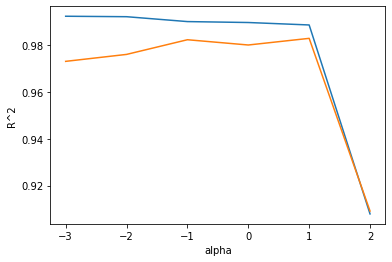

In [22]:
plt.plot(np.log10(alpha_list), train_score) # 가로축엔 알파(로그값), 세로축엔 훈련 세트의 R^2 점수
plt.plot(np.log10(alpha_list), test_score) # 가로축엔 알파(로그값), 세로축엔 테스트 세트의 R^2 점수
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

왼쪽으로 갈수록 과대적합, 오른쪽으로 갈수록 엄청난 과소적합을 보이고 있다.

적절한 알파값은 대략 1 부근이므로, alpha=10으로 두고 다시 모델을 학습 및 평가해보자.

In [23]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


라쏘 모델은 계수를 0으로 만들 수 있다고 했는데, 과연 그 개수가 몇인지 알아보자.

In [24]:
print(np.sum(lasso.coef_ == 0))

40


무려 40개의 특성의 계수가 0이다.

이런 특징 때문에, 라쏘 모델을 유용한 특성을 골라내는 용도로도 사용할 수 있다.